# Variational Quantum Eigensolver

The aim of the task is to find the lowest eigenvalue of the following unitary matrix

$$
\left(\begin{array}{cccccccc}
0 & \sqrt{2}A & \sqrt{2}A & 0 & 0 & 0 & 1 & 1\\
\sqrt{2}A & 0 & 0 & 0 & \sqrt{2} & 0 & 0 & 0\\
\sqrt{2}A & 0 & 0 & 0 & 0 & \sqrt{2} & 0 & 0\\
0 & 0 & 0 & 2\Delta & 0 & 0 & 1 & 1\\
0 & \sqrt{2} & 0 & 0 & \Delta & 0 & A & 0\\
0 & 0 & \sqrt{2} & 0 & 0 & \Delta & 0 & A\\
1 & 0 & 0 & 1 & A & 0 & \Delta & 0\\
1 & 0 & 0 & 1 & 0 & A & 0 & \Delta
\end{array}\right)
$$

using VQE-like circuits. In order to do so, one must find a decomposition of the unitary $U$ in terms of Pauli operators $\{I, X, Y, Z\}$:

$$
I =
\begin{bmatrix}
1 & 0  \\
0 & 1
\end{bmatrix}\quad

X =
\begin{bmatrix}
0 & 1 \\
1& 0
\end{bmatrix}\quad

Y =
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}\quad

Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

in order to be implemented on a quantum computer. In particular, since we are dealing with a $8\times8$ matrix, three qubits are needed, thus the desired decomposition will be made of *tensor products* of three Pauli operators (e.g. $X_1 \otimes Y_2 \otimes Z_3$, where the subscript denotes the system on which the operator acts).

### Decomposition in terms of Pauli operators


By calculation, it can be decomposed as follows: 

$$
U = \frac{A \text{$\sigma $i}\otimes \text{$\sigma $x}\otimes \text{$\sigma $z}}{2 \sqrt{2}}+\frac{A \text{$\sigma $i}\otimes \text{$\sigma $z}\otimes \text{$\sigma $x}}{2
   \sqrt{2}}+\frac{A \text{$\sigma $z}\otimes \text{$\sigma $i}\otimes \text{$\sigma $x}}{2 \sqrt{2}}\\
   +\left(\frac{A}{2 \sqrt{2}}-\frac{A}{2}\right) \text{$\sigma $z}\otimes
   \text{$\sigma $x}\otimes \text{$\sigma $i}+\frac{A \text{$\sigma $i}\otimes \text{$\sigma $i}\otimes \text{$\sigma $x}}{2 \sqrt{2}}+\left(\frac{A}{2
   \sqrt{2}}+\frac{A}{2}\right) \text{$\sigma $i}\otimes \text{$\sigma $x}\otimes \text{$\sigma $i}\\
   +\frac{A \text{$\sigma $z}\otimes \text{$\sigma $x}\otimes \text{$\sigma
   $z}}{2 \sqrt{2}}+\frac{A \text{$\sigma $z}\otimes \text{$\sigma $z}\otimes \text{$\sigma $x}}{2 \sqrt{2}}-\frac{1}{4} \Delta  \text{$\sigma $i}\otimes \text{$\sigma
   $i}\otimes \text{$\sigma $z}-\frac{1}{4} \Delta  \text{$\sigma $i}\otimes \text{$\sigma $z}\otimes \text{$\sigma $i}\\
   +\frac{1}{4} \Delta  \text{$\sigma $i}\otimes
   \text{$\sigma $z}\otimes \text{$\sigma $z}-\frac{1}{4} \Delta  \text{$\sigma $z}\otimes \text{$\sigma $i}\otimes \text{$\sigma $i}-\frac{1}{4} \Delta  \text{$\sigma
   $z}\otimes \text{$\sigma $i}\otimes \text{$\sigma $z}\\
   -\frac{1}{4} \Delta  \text{$\sigma $z}\otimes \text{$\sigma $z}\otimes \text{$\sigma $i}+\\
   \frac{3}{4} \Delta 
   \text{$\sigma $i}\otimes \text{$\sigma $i}\otimes \text{$\sigma $i}+\frac{1}{4} \Delta  \text{$\sigma $z}\otimes \text{$\sigma $z}\otimes \text{$\sigma
   $z}-\frac{\text{$\sigma $x}\otimes \text{$\sigma $i}\otimes \text{$\sigma $z}}{4}\\
   -\frac{\text{$\sigma $x}\otimes \text{$\sigma $z}\otimes \text{$\sigma
   $i}}{4}+\frac{\text{$\sigma $x}\otimes \text{$\sigma $i}\otimes \text{$\sigma $i}}{4}+\left(\frac{1}{4}+\frac{1}{2 \sqrt{2}}\right) \text{$\sigma $x}\otimes \text{$\sigma
   $i}\otimes \text{$\sigma $x}\\
   +\frac{\text{$\sigma $x}\otimes \text{$\sigma $x}\otimes \text{$\sigma $i}}{4}+\left(\frac{1}{4}+\frac{1}{2 \sqrt{2}}\right) \text{$\sigma
   $y}\otimes \text{$\sigma $i}\otimes \text{$\sigma $y}\\
   -\frac{\text{$\sigma $y}\otimes \text{$\sigma $y}\otimes \text{$\sigma $i}}{4}+\left(\frac{1}{2
   \sqrt{2}}-\frac{1}{4}\right) \text{$\sigma $x}\otimes \text{$\sigma $y}\otimes \text{$\sigma $y}\\
   +\left(-\frac{1}{4}-\frac{1}{2 \sqrt{2}}\right) \text{$\sigma $y}\otimes
   \text{$\sigma $x}\otimes \text{$\sigma $y}+\left(\frac{1}{2 \sqrt{2}}-\frac{1}{4}\right) \text{$\sigma $y}\otimes \text{$\sigma $y}\otimes \text{$\sigma
   $x}\\
   +\frac{\text{$\sigma $x}\otimes \text{$\sigma $x}\otimes \text{$\sigma $z}}{4}+\left(\frac{1}{2 \sqrt{2}}-\frac{1}{4}\right) \text{$\sigma $x}\otimes \text{$\sigma
   $z}\otimes \text{$\sigma $x}\\
   +\frac{\text{$\sigma $x}\otimes \text{$\sigma $z}\otimes \text{$\sigma $z}}{4}+\left(\frac{1}{4}+\frac{1}{2 \sqrt{2}}\right) \text{$\sigma
   $x}\otimes \text{$\sigma $x}\otimes \text{$\sigma $x}\\
   -\frac{\text{$\sigma $y}\otimes \text{$\sigma $y}\otimes \text{$\sigma $z}}{4}+\left(\frac{1}{2
   \sqrt{2}}-\frac{1}{4}\right) \text{$\sigma $y}\otimes \text{$\sigma $z}\otimes \text{$\sigma $y}
$$

that is, we found the desired decomposition of matrix $U$ in terms of Pauli operators. Since in VQE algorithms one usually deals with the minimization of the energy of a system, from now on we call the unitary matrix *Hamiltonian* $U \rightarrow \mathcal{H}$ of the system, and *energy* its mean value when evaluated on a given state $|\psi(\theta)\rangle$, that is $E(\theta) = \langle \mathcal{H} \rangle_{\theta}=\langle \psi(\theta) | \mathcal{H}|\psi(\theta)\rangle$.  
Notice that, $|\psi(\theta)$ is an *eigenvector* of the unitary $\mathcal{H}$, with the energy $E(\theta)$ being the corresponding *eigenvalue*. Our task is then to find the lowest eigenvalue of $\mathcal{H}$. 

### Variational Quantum Eigensolver

The idea behind VQE, is to use a quantum computer to evaluate the mean value of the *Hamiltonian* on a trial state $|\psi(\theta)\rangle$ parametrized by $\theta$, and then slowly change this parameter in order to find lower and lower values for the energy $E(\theta)$.  

  

***Measurements in quantum computers generally happens along the $Z$ basis (known as *computational basis*), which means that we can only measure eigevectors and eigenvalues of $Z$.*** In order to measure other different observables, we need to change basis, and this can be done by introducing some gate before the measurement happens. 

### Change of basis

Noticing that:
$$
X=HZH\quad Y=(HS^\dagger)^\dagger Z(HS^\dagger)
$$
we can measure along the X basis by introducing an Hadamard $H$ gate before the measurement. Same happens with $Y$, by using a combination of Hadamard and Phase gates $HS^\dagger$.  

However, in our case we wish to measure two-qubits observables. 

#### Observable $Z_1 Z_2 Z_3$
  
The operator $Z_1 Z_2 Z_3$ acts like: 
$$
Z_{1}Z_{2}Z_{3}\left|000\right\rangle 	=+1\\
Z_{1}Z_{2}Z_{3}\left|011\right\rangle 	=+1\\
Z_{1}Z_{2}Z_{3}\left|101\right\rangle 	=+1\\
Z_{1}Z_{2}Z_{3}\left|110\right\rangle 	=+1\\
Z_{1}Z_{2}Z_{3}\left|001\right\rangle 	=-1\\
Z_{1}Z_{2}Z_{3}\left|010\right\rangle 	=-1\\
Z_{1}Z_{2}Z_{3}\left|100\right\rangle 	=-1\\
Z_{1}Z_{2}Z_{3}\left|111\right\rangle 	=-1\\
$$
In calculation, we firstly checks whether the first two qubits are in the same state (both $0$ or both $1$), in which case it has eigenvalue $1$, otherwise it has eigenvalue $-1$. A similar action can be implemented using a CNOT, in fact this gates loads on the second qubit the binary sum of the two qubits $\text{CNOT}|q_1\rangle|q_2\rangle=|q_1\rangle|q_1\oplus q_2\rangle$. Next, we will perform the same calculation on the second and third bits.

In fact, if
* $q_1 = q_2$ (qubits are in the same state), it holds that $|q_1\oplus q_2\rangle = |0\rangle$ and a measurement of the second qubit in the computational basis ($Z$ basis) yields result $+1$, 
* $q_1\neq q_2$, then $|q_1\oplus q_2\rangle=|1\rangle$ and a measurement would yield result $-1$, as desired.
Then, for the second and third qubits, we perform the same operations.

> Remember that, given a general qubit state $|\psi\rangle=\alpha |0\rangle + \beta |1\rangle$, it holds $\langle Z \rangle = \langle \psi | Z | \psi \rangle = |\alpha|^2-|\beta|^2$.

In this way, we can measure the observable $Z_1 Z_2 Z_3$ by introducing two CNOT gates and then measuring the third qubit in the usual $Z$ basis, as reported in the following circuit:

In [1]:
import deepquantum as dq
import numpy as np
import cma
from cma.fitness_functions import elli  # cannot be an instance method
from cma.optimization_tools import EvalParallel2

Measurement in the ZZZ basis


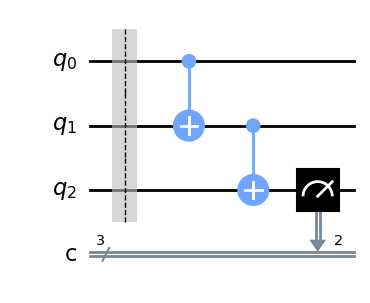

In [2]:
qc = dq.QubitCircuit(3)

qc.barrier()

qc.cx(0,1)
qc.cx(1,2)
qc()

counts = qc.measure(wires=2)

print("Measurement in the ZZZ basis")
qc.draw()

In [3]:
print(counts)

{'0': 1024}


Other observables can be reduced to a measurement of $Z_1 Z_2 Z_3$ by means of appropriate unitary transofmations (change of basis).

#### Observable $X_1 X_2 X_3$

Using $X=HZH$ and the CNOT gates, we have that the measurement in the $X_1 X_2 X_3$ can be achieved using the following circuit:

Measurement in the XXX basis


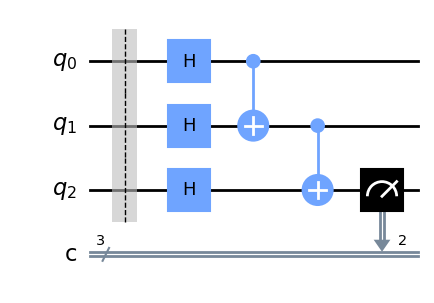

In [4]:
qc = dq.QubitCircuit(3)
qc.barrier()

qc.h(0)
qc.h(1)
qc.h(2)

qc.cx(0,1)
qc.cx(1,2)

qc.measure(wires=2)

print("Measurement in the XXX basis")
qc.draw()

#### Observable $Y_1 Y_2 Y_3$

Using $Y=(HS^\dagger)^\dagger Z(HS^\dagger)$ and the CNOT gates, we have that the measurement in the $Y_1 Y_2 Y_3$ can be achieved using the following circuit:

Measurement in the YYY basis


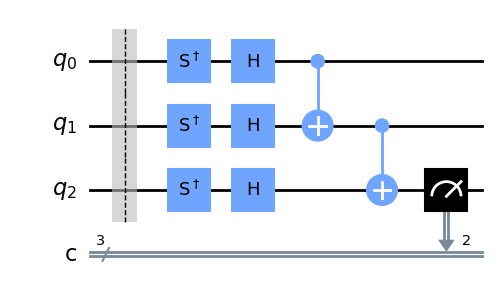

In [5]:
qc = dq.QubitCircuit(3)
qc.barrier()

qc.sdg(0)
qc.sdg(1)
qc.sdg(2)

qc.h(0)
qc.h(1)
qc.h(2)

qc.cx(0,1)
qc.cx(1,2)
qc.measure(wires=2)
print("Measurement in the YYY basis")
qc.draw(output="mpl")

## VQE

We now proceed implementing the VQE architecure, which works as follows:
* choose an ansatz for a trial state $|\psi(\theta)\rangle$, parametrized by the parameter $\theta$
* use quantum circuits to estimate the mean values
* compute the energy $E(\theta)=\langle \mathcal{H} \rangle_\theta$
* change $\theta$ in order to reach a lower energy


VQE can be used for many things. The most popular application of VQE is for the quantum chemistry problem, as in this paper (https://arxiv.org/abs/1701.02691), where they are trying to find the ground state wavefunction of a molecular Hamiltonian (i.e. the VQE is trying to find the eigenvector with the smallest eigenvalue/energy). Here you can see that they suggest a unitary coupled cluster (UCC) ansatz. The reason they choose UCC is because it is well-known that coupled cluster already gives a very good approximation of the ground state wavefunction, in fact it is the basis for what chemists call the "gold standard of quantum chemistry".

Remember VQE is a heuristic. The better the ansatz that you start with, the more likely your VQE will perform well. We can use intuition, or trial-and-error, or just use any knowledge you have of the problem to come up with something that you believe will work well (as in the case of using a coupled cluster ansatz for the problem where coupled cluster is already considered "the gold standard" for people solving the problem on classical computers).

There is no general recipe for how to come up with the ansatz for VQE which will universally work well on every VQE problem, and that is why VQE is called a "heuristic".

## Functions declaration

### Builds the trial state using the ansatz:

Arguments
* qc: is a QubitCircuit object from deepquantum
* theta (real): is the parameter parametrizing the trial state

Return
- qc: returns the input quantum circuit added with the gates creating the trial state
    


In [6]:
def ansatz(qc, theta):
    # qc = dq.QubitCircuit(3)
    
    [theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9] = theta
    
    qc.rx(0,theta_1)
    qc.rx(1,theta_2)
    qc.rx(2,theta_3)
    
    qc.rz(0,theta_4)
    qc.rz(1,theta_5)
    qc.rz(2,theta_6)
    
    qc.barrier()
    
    qc.rxx([0,1],theta_7)
    qc.rxx([0,2],theta_8)
    
    qc.barrier()
    
    qc.rxx([1,2],theta_9)
    
    return qc

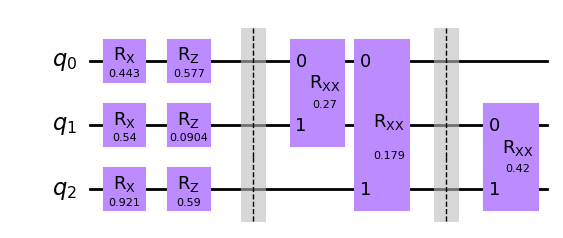

In [7]:
qc = dq.QubitCircuit(3)
theta = np.random.random(9)
qc = ansatz(qc,theta)
qc.draw()

In general, we need a total of 64 different circuits for measurement.

### Implements the quantum measurements in different 64 basis:

Arguments
* qc: is a QubitCircuit object from deepquantum
* op (str): is a string with possible values.

Return
- qc: returns the input quantum circuit added with the appropriate gates to measure in the selected basis.


In [8]:
op = 'XXXYYZZZIII'
len(op), op.count('I')

(11, 3)

In [9]:
def measurements(qc, op, shots):
    
    if op.count('I') == 0:
        for i in range(len(op)):
            # Change of basis, since X = HZH
            if op[i] == "X":
                qc.h(i)
                
            # Change of basis, since Y = (HS†)Z(HS†)
            elif op[i] == "Y":
                qc.sdg(i)
                qc.h(i)
        
        # CNOT used to measure ZZ operator
        for i in range(len(op)-1):
            qc.cx(i,i+1)
            
        qc()
        
        counts =  qc.measure(shots=shots, wires=len(op)-1)
            
    elif op.count('I') == 1:
        
        index = []
        
        for i in range(len(op)):
            if op[i] != 'I':
                
                index.append(i)
                
                if op[i] == 'X':
                    qc.h(i)
                elif op[i] == 'Y':
                    qc.sdg(i)
                    qc.h(i)
                    
        qc.cx(index[0],index[1])
        
        qc()
        counts =  qc.measure(shots=shots, wires=index[1])
    
    elif op.count('I') == 2:
        for i in range(len(op)):
            if op[i] != 'I':
                if op[i] == 'X':
                    qc.h(i)
                elif op[i] == 'Y':
                    qc.sdg(i)
                    qc.h(i)
                    
                qc()
                counts =  qc.measure(shots=shots, wires=i)
    
    else:
        counts = {'0': shots}
    
    
        # Check the results, and evaluate the mean value dividing by the number of shots
    if len(counts) == 1: 
        try:
            counts['0']
            mean_val = 1
        except:
            mean_val = -1
    else:
        # Evaluates the mean value of Z operator, as the difference in the number of 
        # 0s and 1s in the measurement outcomes
        mean_val = (counts['0']-counts['1'])/shots
        
    return mean_val
    

### Evaulates the Energy of the trial state using the mean values of the operators.

Arguments
* params (dict): is an dictionary containing the mean values form the measurements of the operators

Return
- en (real): energy of the system

In [10]:
import numpy as np
from numpy import kron

def HS(M1, M2):
    """Hilbert-Schmidt-Product of two matrices M1, M2"""
    return (np.dot(M1.conjugate().transpose(), M2)).trace()

def decompose(H):
    """Decompose Hermitian matrix H into Pauli matrices"""
    
    sx = np.array([[0, 1],  [ 1, 0]], dtype=np.complex128)
    sy = np.array([[0, -1j],[1j, 0]], dtype=np.complex128)
    sz = np.array([[1, 0],  [0, -1]], dtype=np.complex128)
    id = np.array([[1, 0],  [ 0, 1]], dtype=np.complex128)
    S = [sx, sy, sz, id]
    labels = ['X', 'Y', 'Z', 'I']
    
    decomposed_H = {}
    for i in range(4):
        for j in range(4):
            for k in range(4):
                
                label = labels[i] + labels[j] + labels[k]
                a_ij = 0.125 * HS( kron(kron(S[i], S[j]), S[k]), H)
                
                if abs(a_ij) > 1e-6:
                    decomposed_H[label] = a_ij.real
                                
                    # print(f'{label:<10} {a_ij}')
    return decomposed_H


A, delta = 0,1

H = np.array([  [0, A * np.sqrt(2), A * np.sqrt(2), 0, 0, 0, 1, 1],
                [A * np.sqrt(2), 0, 0, 0, np.sqrt(2), 0, 0, 0],
                [A * np.sqrt(2), 0, 0, 0, 0, np.sqrt(2), 0, 0],
                [0, 0, 0, 2 * delta, 0, 0, 1, 1],
                [0, np.sqrt(2), 0, 0, delta, 0, A, 0],
                [0, 0, np.sqrt(2), 0, 0, delta, 0, A],
                [1, 0, 0, 1, A, 0, delta, 0],
                [1, 0, 0, 1, 0, A, 0, delta]])

# A = 0, delta = 1
decomposed_H = decompose(H)
decomposed_H

{'XXX': 0.6035533905932737,
 'XXZ': 0.25,
 'XXI': 0.25,
 'XYY': 0.10355339059327379,
 'XZX': 0.10355339059327379,
 'XZZ': 0.25,
 'XZI': -0.25,
 'XIX': 0.6035533905932737,
 'XIZ': -0.25,
 'XII': 0.25,
 'YXY': -0.6035533905932737,
 'YYX': 0.10355339059327379,
 'YYZ': -0.25,
 'YYI': -0.25,
 'YZY': 0.10355339059327379,
 'YIY': 0.6035533905932737,
 'ZZZ': 0.25,
 'ZZI': -0.25,
 'ZIZ': -0.25,
 'ZII': -0.25,
 'IZZ': 0.25,
 'IZI': -0.25,
 'IIZ': -0.25,
 'III': 0.75}

In [11]:
def hamiltonian(vqe_res):
    en = 0.
    for key in decomposed_H.keys(): 
        en += vqe_res[key] * decomposed_H[key]
    return en

### Executes the VQE algorithm. 
Creates and executes three quantum circuits, then evaluates the energy.

Arguments
* theta (real): is the parameters parametrizing the trial state

Return
- energy (real): the energy of the system



In [12]:
np.random.seed(123)
theta = np.random.random(9)

24 {'XXX': 0.08, 'XXZ': -0.34, 'XXI': 0.2, 'XYY': 0.52, 'XZX': -0.44, 'XZZ': -0.14, 'XZI': 0.04, 'XIX': 0.12, 'XIZ': 0.06, 'XII': 0.44, 'YXY': 0.26, 'YYX': 0.28, 'YYZ': 0.14, 'YYI': 0.32, 'YZY': 0.02, 'YIY': 0.34, 'ZZZ': 0.76, 'ZZI': 0.44, 'ZIZ': 0.28, 'ZII': 0.3, 'IZZ': 0.32, 'IZI': 0.44, 'IIZ': 0.5, 'III': 1}
0.6383452377915606


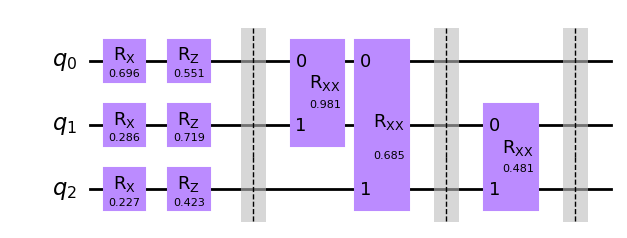

In [13]:
vqe_res = dict()
shots = 10 ** 2

for op in decomposed_H.keys():

    qc = dq.QubitCircuit(3)

    qc = ansatz(qc, theta)
    qc.barrier()    
    
    vqe_res[op] = measurements(qc,op,shots)
    
print(len(vqe_res),vqe_res)
energy = hamiltonian(vqe_res)
print(energy.real)
qc.draw()

In [14]:
def vqe_step(theta):
    
    # Number of executions for each quantum circuit
    shots = 2**10
    
    vqe_res = dict()
    # qc_list = dict()
    
    for op in decomposed_H.keys():
        
        qc = dq.QubitCircuit(3)

        # Implementation of the ansatz
        qc = ansatz(qc, theta)

        # Just for plotting purposes
        qc.barrier()

        # Measurements in the appropriate basis are implemented
        
        # Get the measurements results            
            
        vqe_res[op] = measurements(qc, op, shots)
        # qc_list[op] = qc
        
    energy = hamiltonian(vqe_res)
    # print(theta, abs(energy + 1.23607))
    return energy

Let's try if it all works properly:

In [15]:
# Set the value of theta
theta = np.random.random(9)

# Run the VQE step to evaluate the energy (eigenvalue of the Hamiltonian) of the state with given theta
energy = vqe_step(theta)
energy

0.2726364859089031

Our aim is to find a value for the parameter that yields the lowest possible energy, and that is the desired lowest eigenvalue for the Task.  


##### Using an optimizator

In [16]:
from cma.fitness_functions import elli  # cannot be an instance method
from cma.optimization_tools import EvalParallel2

In [17]:
# cma.s.pprint(cma.CMAOptions())

In [18]:
options = {'seed':123, 'popsize':30, 'maxiter':100, 'verb_disp': 50}

es = cma.CMAEvolutionStrategy(9 * [0], .6, options)
# with EvalParallel2(elli, es.popsize + 1) as eval_all:
#     while not es.stop():
#         solutions = es.ask()
#         # print(len(solutions))
#         es.tell(solutions, [vqe_step(x) for x in solutions])
#         es.manage_plateaus()
#         es.logger.add()  # write data to disc to be plotted
#         es.disp()
        

while not es.stop():
    solutions = es.ask()
    es.tell(solutions, [vqe_step(x) for x in solutions])
    # es.manage_plateaus()
    es.logger.add()  # write data to disc to be plotted
    es.disp()
        
es.result_pretty()

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 9 (seed=123, Fri Aug 18 10:39:16 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 -9.594356643026125e-02 1.0e+00 5.07e-01  5e-01  5e-01 0:02.7
    2     60 -7.467683930865432e-02 1.3e+00 4.53e-01  4e-01  5e-01 0:05.4
    3     90 -2.002885297163135e-01 1.5e+00 4.39e-01  4e-01  5e-01 0:08.1
    5    150 -3.534934298315673e-01 2.0e+00 3.86e-01  3e-01  5e-01 0:13.4
    7    210 -7.599526578160625e-01 2.8e+00 4.73e-01  3e-01  6e-01 0:18.8
    9    270 -5.748162420121394e-01 3.7e+00 5.03e-01  3e-01  6e-01 0:24.2
   12    360 -8.198198848737837e-01 3.3e+00 4.87e-01  3e-01  6e-01 0:32.3
   15    450 -8.810404540519903e-01 2.8e+00 5.21e-01  3e-01  5e-01 0:40.4
   18    540 -9.266132296783285e-01 3.0e+00 5.23e-01  3e-01  5e-01 0:48.6
   22    660 -9.904918314805076e-01 3.4e+00 3.89e-01  2e-01  4e-01 0:59.6
   26    780 -1.057466650914257e+00 3.5e+00 3.06e-01  2e-01  3e-01 1:10.4
   31    930 -1.051113040

CMAEvolutionStrategyResult(xbest=array([-1.63938481, -1.55904436,  0.38170912, -0.1314816 ,  1.14620517,
       -0.39713635, -0.17858467, -1.43375697, -1.22019224]), fbest=-1.218752641392276, evals_best=2620, evaluations=3000, iterations=100, xfavorite=array([-1.56952952, -1.53159239,  0.31615041, -0.2036287 ,  1.12366368,
       -0.6312495 , -0.01311604, -1.60711471, -1.30194628]), stds=array([0.10205438, 0.07430578, 0.08920904, 0.07071721, 0.10064357,
       0.22390553, 0.13013836, 0.07691235, 0.12551574]), stop={'maxiter': 100})

In [25]:
print(es.result.fbest)

-1.218752641392276


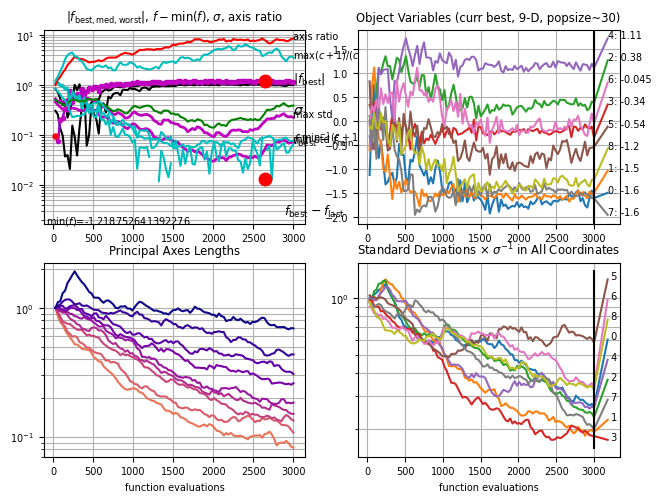

In [20]:
cma.plot()